# Examples

This Jupyter notebook shows some examples for the different functions of the Python module `cqtsec`.

Functions:
- [`mfcc`](#mfcc) - Compute the mel-frequency cepstral coefficients (MFCCs) (using librosa).
- [`cqtspectrogram`](#cqtspectrogram) - Compute the (magnitude) constant-Q transform (CQT) spectrogram (using librosa).
- [`cqtdeconv`](#cqtdeconv) -     Deconvolve the constant-Q transform (CQT) spectrogram into a pitch-independent spectral envelope and an energy-normalized pitch component.
- [`cqtsec`](#cqtsec) - Compute the CQT spectral envelope coefficients (CQT-SEC).


Author:
- Zafar Rafii
- zafarrafii@gmail.com
- http://zafarrafii.com
- https://github.com/zafarrafii
- https://www.linkedin.com/in/zafarrafii/
- 08/16/21

## <a id="mfcc"></a>mfcc

Compute the mel-frequency cepstral coefficients (MFCCs) (using librosa).

```
audio_mfcc = cqtsec.mfcc(audio_signal, sampling_frequency, window_length, step_length, number_coefficients)

Inputs:
    audio_signal: audio signal (number_samples,)
    sampling_frequency: sampling frequency in Hz
    window_length: window length in samples
    step_length: step length in samples
    number_coefficients: number of MFCCs (default: 20 coefficients)
Output:
    audio_mfcc: audio MFCCs (number_coefficients, number_frames)
```

### Example: Compute the MFCCs from an audio file.

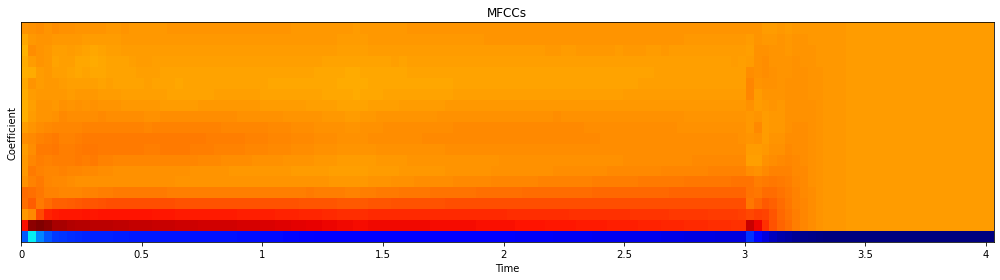

In [1]:
%matplotlib inline

# Import the modules
import numpy as np
import cqtsec
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio signal
file_path = r'bass_acoustic_000-036-075.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)

# Define the parameters and compute the MFCCs
window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
step_length = int(window_length / 2)
number_coefficients = 20
audio_mfcc = cqtsec.mfcc(audio_signal, sampling_frequency, window_length, step_length, number_coefficients)

# Display the MFCCs
plt.figure(figsize=(14, 4))
librosa.display.specshow(audio_mfcc, x_axis='time', sr=sampling_frequency, hop_length=step_length, cmap='jet')
plt.title('MFCCs')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

## <a id="cqt"></a>cqtspectrogram

Compute the (magnitude) constant-Q transform (CQT) spectrogram (using librosa).

```
cqt_spectrogram = cqtsec.cqtspectrogram(audio_signal, sampling_frequency, step_length, minimum_frequency, octave_resolution)

Inputs:
    audio_signal: audio signal (number_samples,)
    sampling_frequency: sampling frequency in Hz
    step_length: step length in samples
    minimum_frequency: minimum frequency in Hz (default: 32.70 Hz = C1)
    octave_resolution: number of frequency channels per octave (default: 12 frequency channels per octave)
Output:
    cqt_spectrogram: magnitude CQT spectrogram (number_frequencies, number_frames)
```

### Example: Compute the CQT spectrogram from an audio file.

C:\Users\zarafii2001\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


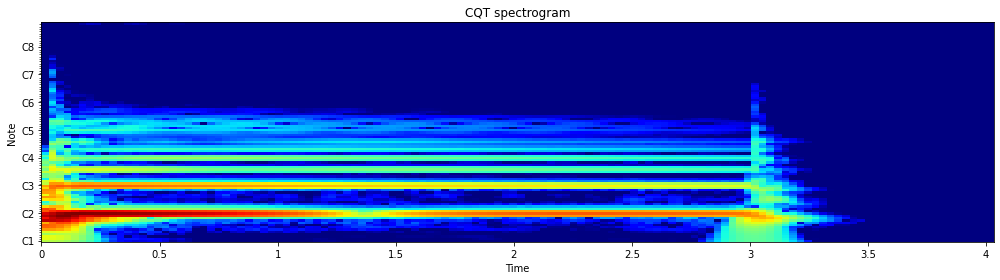

In [2]:
%matplotlib inline

# Import the modules
import numpy as np
import cqtsec
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio signal
file_path = r'bass_acoustic_000-036-075.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)

# Define the parameters and compute the CQT spectrogram
step_length = int(pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency)))) / 2)
minimum_frequency = 32.70
octave_resolution = 12
cqt_spectrogram = cqtsec.cqtspectrogram(audio_signal, sampling_frequency, step_length, minimum_frequency, \
                                        octave_resolution)

# Display the CQT spectrogram
plt.figure(figsize=(14, 4))
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram), x_axis='time', y_axis='cqt_note', \
                         sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, cmap='jet')
plt.title('CQT spectrogram')
plt.tight_layout()
plt.show()

## <a id="cqtdeconv"></a>cqtdeconv

Deconvolve the constant-Q transform (CQT) spectrogram into a pitch-independent spectral envelope and an energy-normalized pitch component.

```
cqt_envelope, cqt_pitch = cqtsec.cqtdeconv(cqt_spectrogram)

Inputs:
    audio_signal: audio signal (number_samples,)
    sampling_frequency: sampling frequency in Hz
    step_length: step length in samples
    minimum_frequency: minimum frequency in Hz (default: 32.70 Hz = C1)
    octave_resolution: number of frequency channels per octave (default: 12 frequency channels per octave)
    number_coefficients: number of CQT-SECs (default: 20 coefficients)
Output:
    cqt_sec: CQT-SECs (number_coefficients, number_frames)
```

### Example: Deconvolve a CQT spectrogram into its spectral envelope and pitch component.

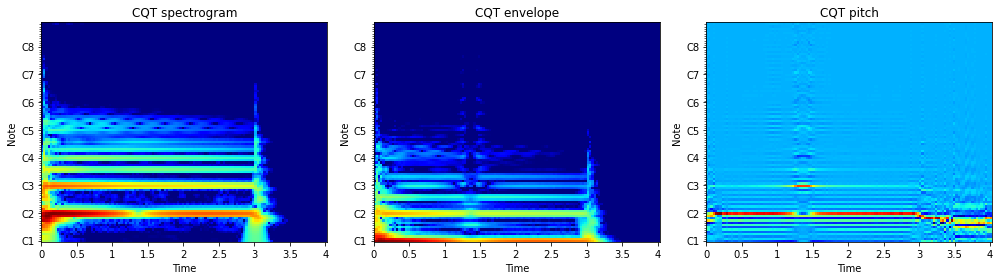

In [3]:
%matplotlib inline

# Import the modules
import numpy as np
import cqtsec
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio signal
file_path = r'bass_acoustic_000-036-075.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)

# Define the parameters and compute the CQT spectrogram
step_length = int(pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency)))) / 2)
minimum_frequency = 32.70
octave_resolution = 12
cqt_spectrogram = cqtsec.cqtspectrogram(audio_signal, sampling_frequency, step_length, minimum_frequency, \
                                        octave_resolution)

# Deconvolve the CQT spectrogram into a CQT envelope and pitch
cqt_envelope, cqt_pitch = cqtsec.cqtdeconv(cqt_spectrogram)

# Display the CQT spectrogram, envelope, and pitch
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram), x_axis='time', y_axis='cqt_note', \
                         sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, cmap='jet')
plt.title('CQT spectrogram')
plt.subplot(1, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope), x_axis='time', y_axis='cqt_note', sr=sampling_frequency, 
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, cmap='jet')
plt.title('CQT envelope')
plt.subplot(1, 3, 3)
librosa.display.specshow(cqt_pitch, x_axis='time', y_axis='cqt_note', sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, cmap='jet')
plt.title('CQT pitch')
plt.tight_layout()
plt.show()

## <a id="cqtsec"></a>cqtsec

Compute the constant-Q transform (CQT) spectral envelope coefficients (CQT-SEC).

```
cqt_sec = cqt_sec.cqtsec(audio_signal, sampling_frequency, step_length, minimum_frequency, octave_resolution, number_coefficients)

Inputs:
    audio_signal: audio signal (number_samples,)
    sampling_frequency: sampling frequency in Hz
    step_length: step length in samples
    minimum_frequency: minimum frequency in Hz (default: 32.70 Hz = C1)
    octave_resolution: number of frequency channels per octave (default: 12 frequency channels per octave)
    number_coefficients: number of CQT-SECs (default: 20 coefficients)
Output:
    cqt_sec: CQT-SECs (number_coefficients, number_frames)
```

### Example: Compute the CQT-SECs from an audio file.

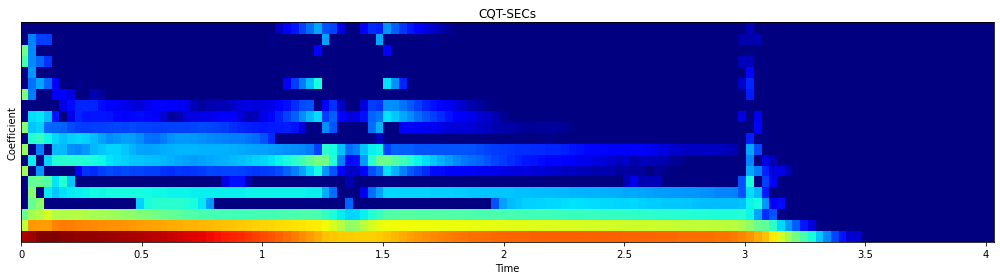

In [5]:
%matplotlib inline

# Import the modules
import numpy as np
import cqtsec
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio signal
file_path = r'bass_acoustic_000-036-075.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)

# Define the parameters and compute the CQT spectrogram
step_length = int(pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency)))) / 2)
minimum_frequency = 32.70
octave_resolution = 12
number_coefficients = 20
cqt_sec = cqtsec.cqtsec(audio_signal, sampling_frequency, step_length, minimum_frequency, octave_resolution, \
                        number_coefficients)

# Display the CQT-SECs
plt.figure(figsize=(14, 4))
librosa.display.specshow(librosa.power_to_db(cqt_sec), x_axis='time', sr=sampling_frequency, hop_length=step_length, \
                         cmap='jet')
plt.title('CQT-SECs')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()